In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_668863/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def train_adaline(x_inputs : np.array, yd : np.array, learning_rate : float, tol : float, maxepochs : int, control_var : bool):
    dimentions = list(x_inputs.shape)
    try:
        N_inputs = dimentions[0]
        n_val_inputs = dimentions[1]
    except Exception as error:
        print(f" The error {error} is happening. It's happening because n_val_inputs has 0 columns.")
        print(f" So, we will change it to 1")
        print(f"Changing ...")
        n_val_inputs = 1
        print(f"Now, n_val_inputs is {n_val_inputs}")
    finally:
        if control_var == True:
            w = np.random.uniform(size = n_val_inputs + 1) - 0.5
            # Estou organizando minha entrada x em colunas, e adicionando 1 coluna extra de 1s.
            aux = np.column_stack([np.ones_like(x_inputs)])
            x_inputs = np.column_stack([x_inputs, aux])
        else:
            w = np.random.uniform(size = n_val_inputs) - 0.5

        n_epochs = 0 # É o número de vezes que estou treinando usando TODOS os dados de entrada.
        erro_epoch = tol + 1
        lst_errors_grad = np.zeros((maxepochs))

        # Loop while que resultará no treino do meu modelo.
        while ((n_epochs < maxepochs) and (erro_epoch > tol)):
            erro_grad = 0

            # Alterando a ordem de dados de treino, no fito de o gradiente descendente não ficar estático em 1 lugar específico.
            change_order_train = np.random.permutation(N_inputs)
            for i in range(N_inputs):
                i_rand = change_order_train[i]
                x_val_train = x_inputs[i_rand, : ]
                # Não é necessário fazer o np.transpose(), pois já fiz implicitamente através do column_stacks.
                y_hat = np.dot(x_val_train, w) #ŷ = ([Xt] @ w)
                err = (yd[i_rand] - y_hat)
                dw = (learning_rate*err* x_inputs[i_rand, :])
                w = w + dw
                erro_grad = erro_grad + (err * err)
                
            lst_errors_grad[n_epochs] = erro_grad / N_inputs
            n_epochs += 1
        return (w, lst_errors_grad)

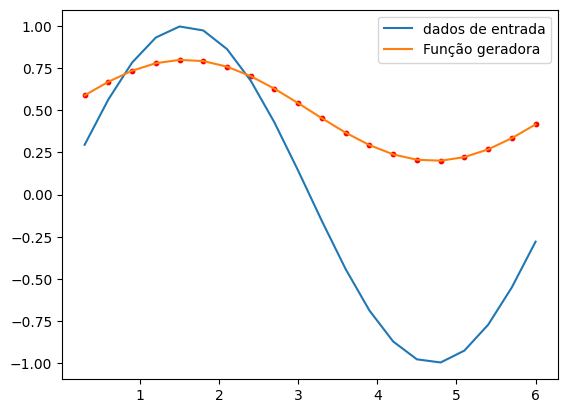

In [3]:
t = np.array(pd.read_csv('Ex1_t', delimiter = ' '))
x = np.array(pd.read_csv('Ex1_x', delimiter = ' '))
y = np.array(pd.read_csv('Ex1_y', delimiter = ' '))
plt.plot(t, x, label = 'dados de entrada')
plt.scatter(t, y, color = 'red', s = 10)
plt.plot(t, y, label = 'Função geradora')
plt.legend()

In [4]:
w, lst_err_grad = train_adaline(x, y, learning_rate = 0.01, tol = 0.01, maxepochs = 10, control_var = True)

/tmp/ipykernel_668863/2970981717.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lst_errors_grad[n_epochs] = erro_grad / N_inputs


In [5]:
t_test = np.arange(start = 0, stop = 2*np.pi, step = 0.025*np.pi)
x_test =  np.sin(t_test)
x_test = np.column_stack([x_test, np.ones_like(x_test)])
y_hat = x_test @ w
w

array([0.27283821, 0.38810889])

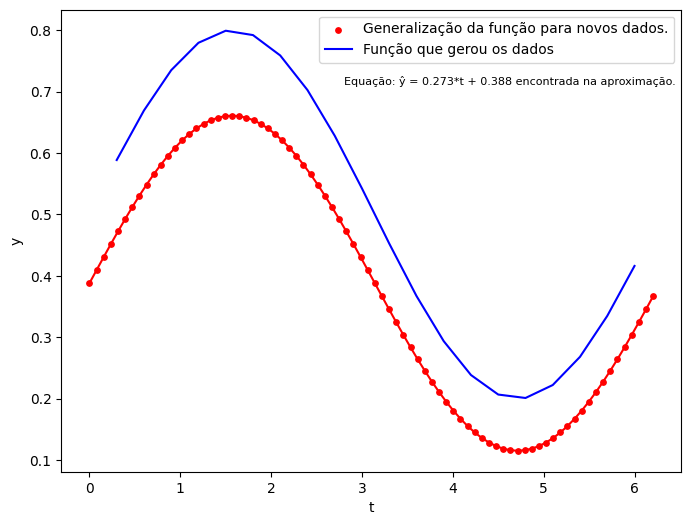

In [8]:
plt.figure(figsize = (8, 6))
plt.scatter(t_test, y_hat, color = 'red', s = 15, label = 'Generalização da função para novos dados.')
plt.plot(t_test, y_hat, color = 'red')
plt.plot(t, y, color = 'blue', label = 'Função que gerou os dados')
plt.xlabel('t')
plt.ylabel('y')

# Adjust text coordinates to be within the plot area
plt.text(min(t_test) + 2.8, max(y_hat) + 0.05, f'Equação: ŷ = {np.round(w[0],3)}*t + {np.round(w[1],3)} encontrada na aproximação.', fontsize = 8, color = 'black')

plt.legend()